In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
mobile_data = pd.read_csv('Cellphone.csv')
mobile_data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [ ]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [4]:
mobile_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Product_id,161.0,675.559006,410.851583,10.0,237.0,774.00,1026.000,1339.0
Price,161.0,2215.596273,768.187171,614.0,1734.0,2258.00,2744.000,4361.0
Sale,161.0,621.465839,1546.618517,10.0,37.0,106.00,382.000,9807.0
weight,161.0,170.426087,92.888612,66.0,134.1,153.00,170.000,753.0
resoloution,161.0,5.209938,1.509953,1.4,4.8,5.15,5.500,12.2
ppi,161.0,335.055901,134.826659,121.0,233.0,294.00,428.000,806.0
cpu core,161.0,4.857143,2.444016,0.0,4.0,4.00,8.000,8.0
cpu freq,161.0,1.502832,0.599783,0.0,1.2,1.40,1.875,2.7
internal mem,161.0,24.501714,28.804773,0.0,8.0,16.00,32.000,128.0
ram,161.0,2.204994,1.609831,0.0,1.0,2.00,3.000,6.0


In [5]:
mobile_data.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [6]:
mobile_data.drop(columns=["Product_id"], inplace=True)
mobile_data.head()

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [7]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(mobile_data.drop(columns=["Price"]))
mobile_data_scaled = pd.DataFrame(scaled_features, columns=mobile_data.columns[1:])
mobile_data_scaled["Price"] = mobile_data["Price"]
mobile_data_scaled
mobile_data_scaled.head()

,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness,Price
0,-0.396590,-0.382572,-0.006602,0.661751,1.289952,-0.255608,-0.296070,0.495385,0.425444,0.807868,-0.170327,-0.696211,2357
1,-0.396590,-0.490564,-0.803808,-0.759303,-1.172684,-0.339231,-0.713968,-0.750857,-1.172970,-1.040327,-0.838100,0.447564,1749
2,-0.396590,-0.652552,-0.338771,-0.171538,-0.351805,-0.506479,-0.574669,-0.439297,0.425444,0.114795,-0.617955,-0.604709,1916
3,-0.395942,-0.560759,-0.803808,-0.759303,-1.172684,-0.339231,-0.713968,-1.054940,-1.172970,-1.040327,-1.058245,0.950825,1315
4,-0.395942,-0.490564,-0.803808,-0.759303,-1.172684,-0.339231,-0.713968,-0.750857,-1.172970,-1.040327,-0.838100,0.447564,1749


In [8]:
# First Model with Outliers
x1=mobile_data_scaled.drop(columns=["Price"])
y1=mobile_data_scaled["Price"]

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25,random_state=42)

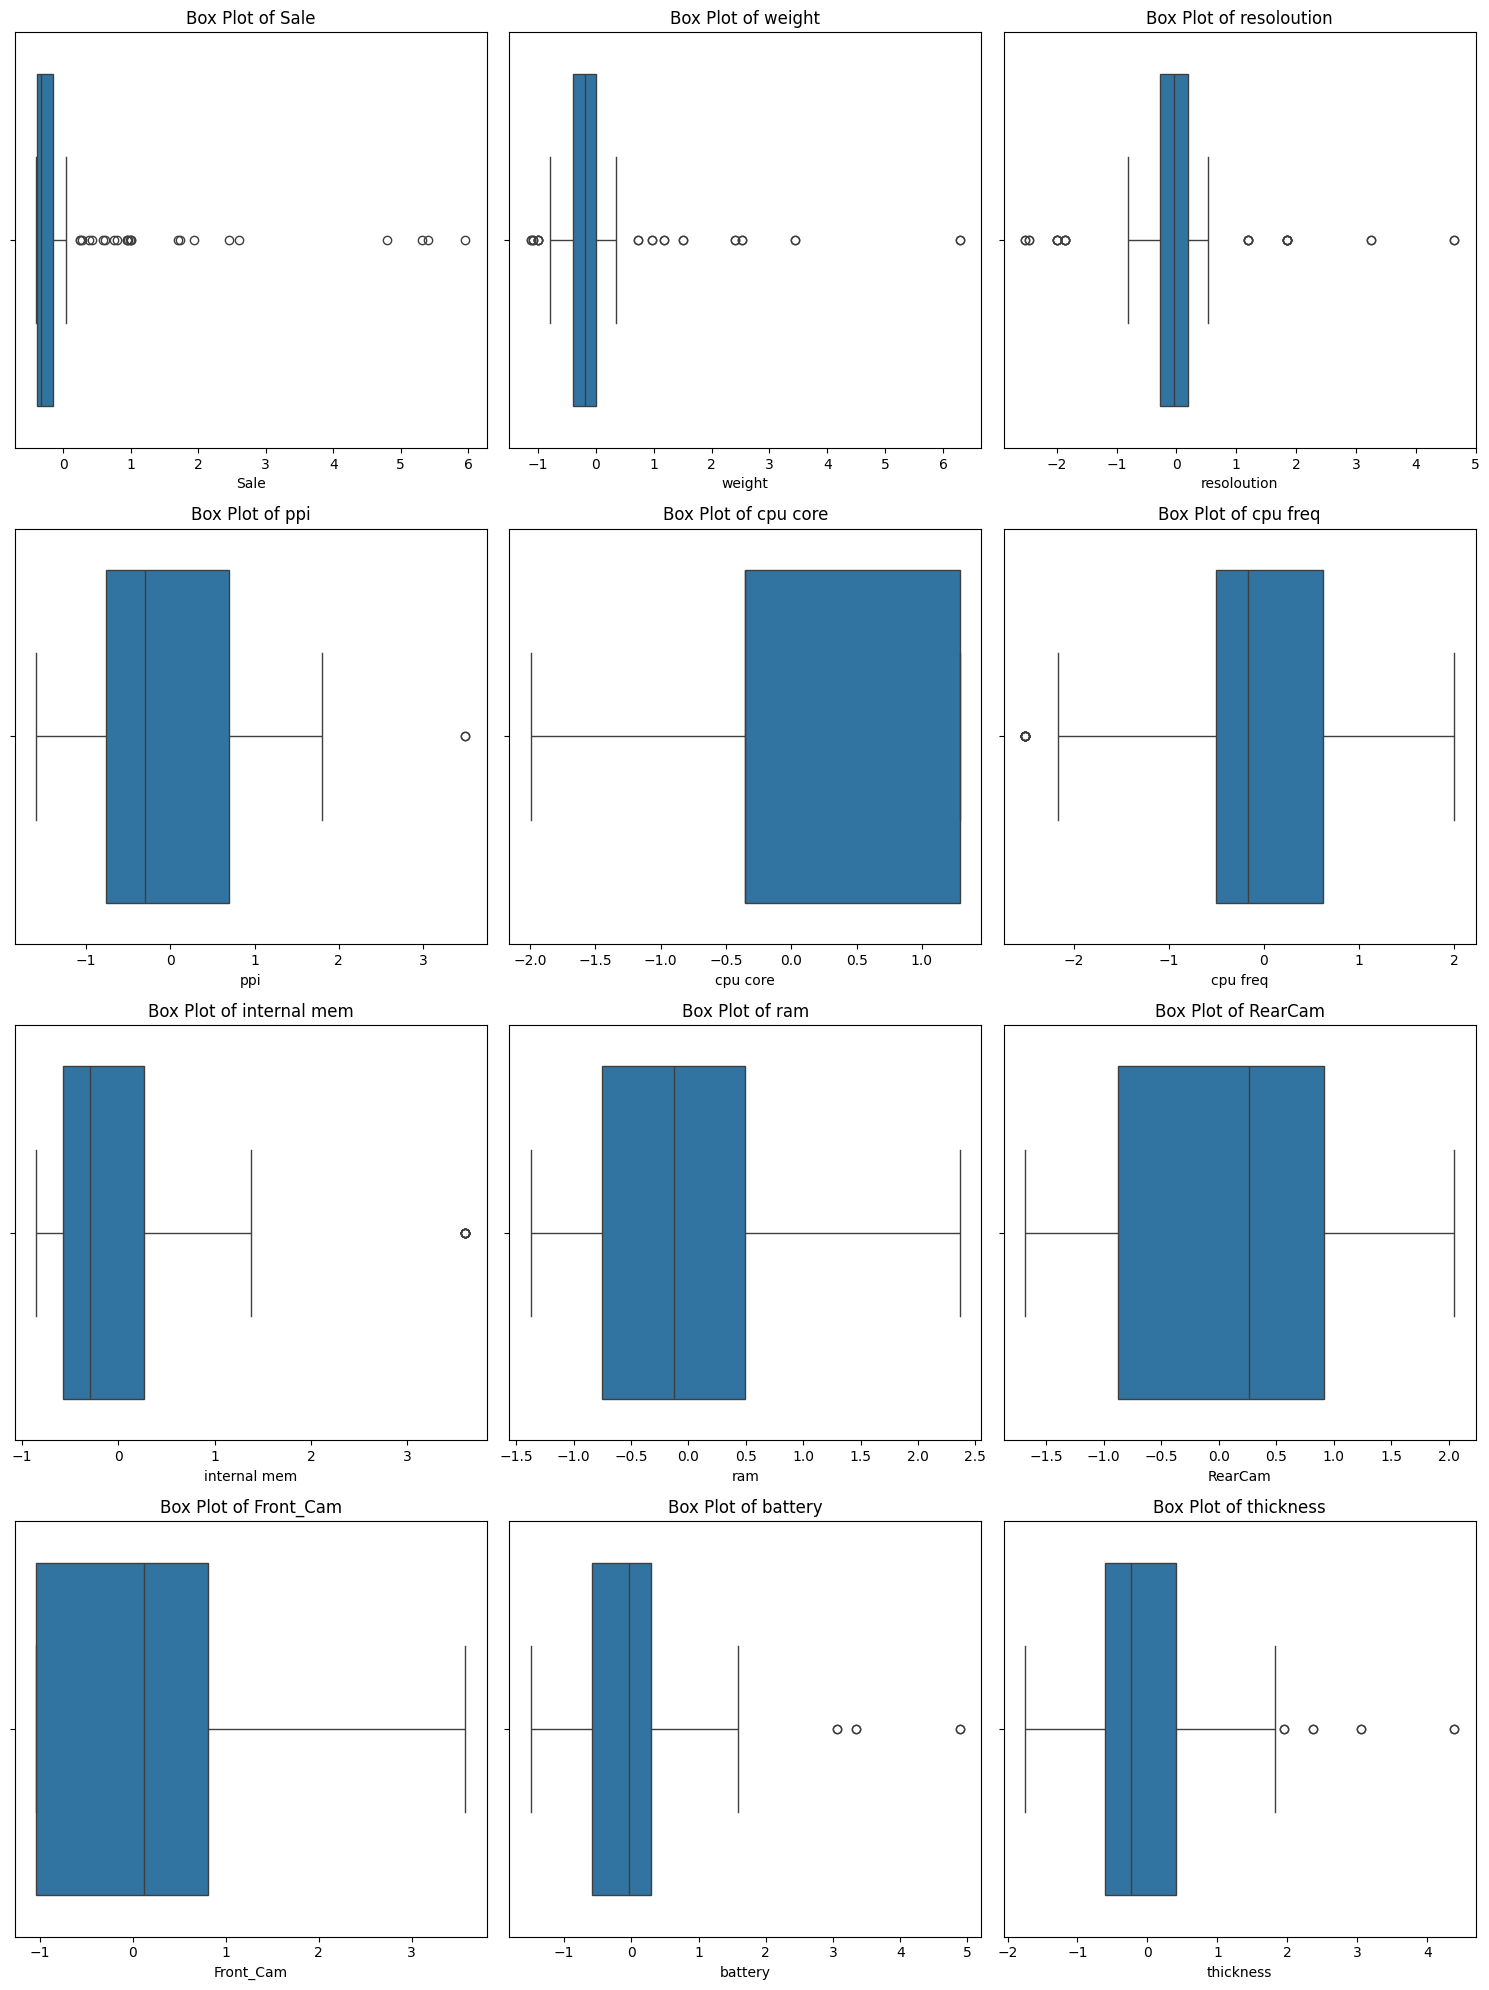

In [10]:
import math


cols_in_grid = 3
total_features = len(x1.columns)

rows_needed = math.ceil(total_features / cols_in_grid)

plt.figure(figsize=(15, 5 * rows_needed)) 

for i, column in enumerate(x1.columns, 1):
    plt.subplot(rows_needed, cols_in_grid, i)
    sns.boxplot(x=x1[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

In [11]:
### Model Building : With Outliers
linear=LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [ ]:
## Try L1 Regularization and L2 Regularization and compare the results with Linear Regression. (ElasticNet, Lasso, Ridge) with Outliers
elastic_net = ElasticNet()
elastic_net.fit(x_train, y_train)
lasso = Lasso()
lasso.fit(x_train, y_train)
ridge = Ridge()
ridge.fit(x_train, y_train)
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
print("***********"*7)
print("Lasso R2 Score (Train):", r2_score(y_train, lasso.predict(x_train)))
print("Lasso R2 Score (Test):", r2_score(y_test, lasso.predict(x_test)))

# Ridge Regression

ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
print("***********"*7)
print("Ridge R2 Score (Train):", r2_score(y_train, ridge.predict(x_train)))
print("Ridge R2 Score (Test):", r2_score(y_test, ridge.predict(x_test)))

# ElasticNet Regression
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)

elastic.fit(x_train, y_train)
print("***********"*7)
print("ElasticNet R2 Score (Train):", r2_score(y_train, elastic.predict(x_train)))
print("ElasticNet R2 Score (Test):", r2_score(y_test, elastic.predict(x_test)))
print("***********"*7)


print("R2 Score (Train):", r2_score(y_train, linear.predict(x_train)))
print("R2 Score (Test):", r2_score(y_test, linear.predict(x_test)))
print("***********"*7)

*****************************************************************************
Lasso R2 Score (Train): 0.9528435284352288
Lasso R2 Score (Test): 0.9564362506793213
*****************************************************************************
Ridge R2 Score (Train): 0.9528433484348592
Ridge R2 Score (Test): 0.9564329491237612
*****************************************************************************
ElasticNet R2 Score (Train): 0.9519252516593327
ElasticNet R2 Score (Test): 0.9537177785562047
*****************************************************************************
R2 Score (Train): 0.8861616668941357
R2 Score (Test): 0.9018661555430066
*****************************************************************************


In [20]:
# Treating Outliers
Q1 = x1.quantile(0.25)
Q3 = x1.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
x1_outliers_removed = x1[~((x1 < lower_bound) | (x1 > upper_bound)).any(axis=1)]
y1_outliers_removed = y1[x1_outliers_removed.index]
x_train_o,x_test_o,y_train_o,y_test_o = train_test_split(x1_outliers_removed,y1_outliers_removed,test_size=0.25,random_state=42)

In [21]:
### Model Building : Without Outliers
linear=LinearRegression()
linear.fit(x_train_o,y_train_o)

LinearRegression()

In [22]:
## Try L1 Regularization and L2 Regularization and compare the results with Linear Regression. (ElasticNet, Lasso, Ridge)


# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(x_train_o, y_train_o)
print("Lasso R2 Score (Train):", r2_score(y_train_o, lasso.predict(x_train_o)))
print("Lasso R2 Score (Test):", r2_score(y_test_o, lasso.predict(x_test_o)))
print("***********"*7)

# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(x_train_o, y_train_o)
print("Ridge R2 Score (Train):", r2_score(y_train_o, ridge.predict(x_train_o)))
print("Ridge R2 Score (Test):", r2_score(y_test_o, ridge.predict(x_test_o)))
print("***********"*7)


# ElasticNet Regression
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(x_train_o, y_train_o)
print("ElasticNet R2 Score (Train):", r2_score(y_train_o, elastic.predict(x_train_o)))
print("ElasticNet R2 Score (Test):", r2_score(y_test_o, elastic.predict(x_test_o)))
print("***********"*7)

print("R2 Score (Train):", r2_score(y_train_o, linear.predict(x_train_o)))
print("R2 Score (Test):", r2_score(y_test_o, linear.predict(x_test_o)))
print("***********"*7)



Lasso R2 Score (Train): 0.9288947687673051
Lasso R2 Score (Test): 0.8240203441062216
*****************************************************************************
Ridge R2 Score (Train): 0.9288216956231916
Ridge R2 Score (Test): 0.825917101572805
*****************************************************************************
ElasticNet R2 Score (Train): 0.9205959277581081
ElasticNet R2 Score (Test): 0.86081583452515
*****************************************************************************
R2 Score (Train): 0.9289133089310221
R2 Score (Test): 0.8226440455897924
*****************************************************************************
